In [8]:
import cvxpy as cp
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Problem 1
### Input data

In [2]:
p_mean = np.array([-0.12,0.10,0.07,0.03,-0.01])
cov = np.array([[0.0069,0.0007,0.0004,0,0.0019],
                [0.0007,0.0025,-0.0002,0,0.0001],
                [0.0004,-0.0002,0.0051,0,0.0024],
                [0,0,0,0.0021,0.0000],
                [0.0019,0.0001,0.0024,0,0.0073]])

### 1(a)

In [3]:
x = cp.Variable(5)
vector1 = np.ones((5),dtype=np.float64)
prob = cp.Problem(cp.Minimize(-p_mean@x),[x>=0,vector1@x==10000])
prob.solve()

-999.9999945668238

In [4]:
print('r*:', prob.value)
print('x*:', x.value)

r*: -999.9999945668238
x*: [1.13957783e-05 9.99999995e+03 9.82448163e-06 1.27996372e-05
 1.57763273e-05]


### 1(b)

Average return: 1008.0995597937734


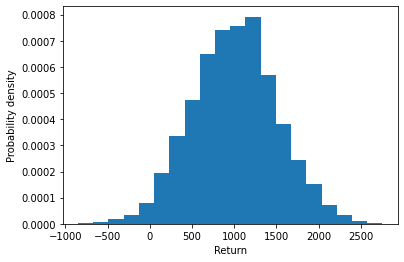

In [25]:
np.random.seed(123) # for reproducing result
x_optimal = x.value
sqrt_cov = scipy.linalg.sqrtm(cov)
p_samples = p_mean + np.random.randn(5000,5)@sqrt_cov
r_samples = p_samples@x_optimal
print('Average return:', np.mean(r_samples))
plt.hist(r_samples,density=True,bins=20)
plt.xlabel('Return')
plt.ylabel('Probability density')
plt.show()

### 1(c)

In [23]:
print('Mean of p:\n',p_mean)
print()
print('Covariance of p:\n',cov)

Mean of p:
 [-0.12  0.1   0.07  0.03 -0.01]

Covariance of p:
 [[ 0.0069  0.0007  0.0004  0.      0.0019]
 [ 0.0007  0.0025 -0.0002  0.      0.0001]
 [ 0.0004 -0.0002  0.0051  0.      0.0024]
 [ 0.      0.      0.      0.0021  0.    ]
 [ 0.0019  0.0001  0.0024  0.      0.0073]]


In [38]:
# to return on
def regularizer(gamma=0):
    x = cp.Variable(5)
    prob = cp.Problem(cp.Minimize(-p_mean@x+gamma*cp.quad_form(x,cov)),[x>=0,vector1@x==10000])
    prob.solve()
    return p_mean@x.value, np.sqrt(x.value@cov@x.value), x.value

In [39]:
optimal_return=[]
optimal_std=[]
for i in np.linspace(-4,4,200):
    temp = regularizer(np.power(10,i))
    optimal_return.append(temp[0])
    optimal_std.append(temp[1])

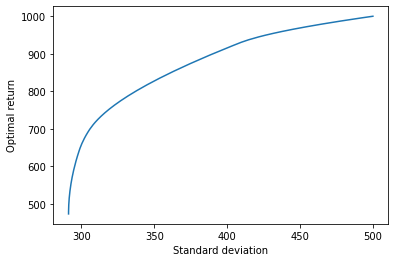

In [40]:
plt.plot(optimal_std,optimal_return)
plt.xlabel('Standard deviation')
plt.ylabel('Optimal return')
plt.show()

### 1(d)
I choose $\gamma=0.01$

In [48]:
x_optimal = regularizer(0.01)[2]

Average return: 698.6423619593329


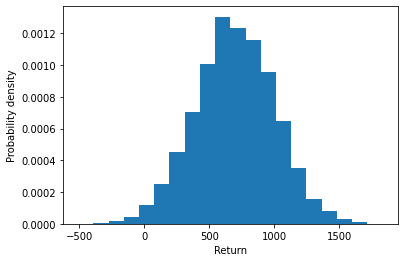

In [49]:
np.random.seed(123) # for reproducing result
p_samples = p_mean + np.random.randn(5000,5)@sqrt_cov
r_samples = p_samples@x_optimal
print('Average return:', np.mean(r_samples))
plt.hist(r_samples,density=True,bins=20)
plt.xlabel('Return')
plt.ylabel('Probability density')
plt.show()

### 1(e)

In [50]:
# to return on
def short(gamma=0):
    x = cp.Variable(5)
    prob = cp.Problem(cp.Minimize(-p_mean@x+gamma*cp.quad_form(x,cov)),[x+2000>=0,vector1@x==10000])
    prob.solve()
    return p_mean@x.value, np.sqrt(x.value@cov@x.value), x.value

In [52]:
optimal_return_e=[]
optimal_std_e=[]
for i in np.linspace(-4,4,200):
    temp = short(np.power(10,i))
    optimal_return_e.append(temp[0])
    optimal_std_e.append(temp[1])

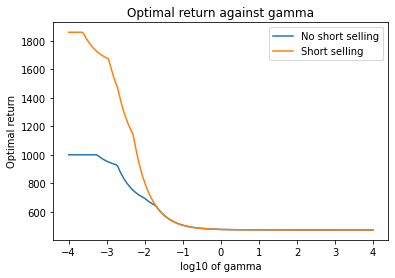

In [59]:
plt.plot(np.linspace(-4,4,200),optimal_return,label='No short selling')
plt.plot(np.linspace(-4,4,200),optimal_return_e,label='Short selling')
plt.xlabel('log10 of gamma')
plt.ylabel('Optimal return')
plt.title('Optimal return against gamma')
plt.legend()
plt.show()

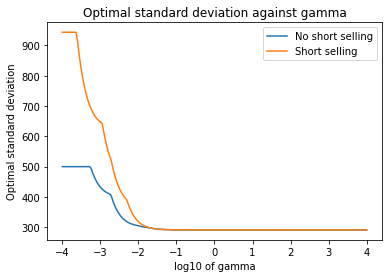

In [61]:
plt.plot(np.linspace(-4,4,200),optimal_std,label='No short selling')
plt.plot(np.linspace(-4,4,200),optimal_std_e,label='Short selling')
plt.xlabel('log10 of gamma')
plt.title('Optimal standard deviation against gamma')
plt.ylabel('Optimal standard deviation')
plt.legend()
plt.show()

## Problem 2